In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Convolution2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import  classification_report
import itertools

In [4]:
model = Sequential()

model.add(Convolution2D(32,(3,3),input_shape = (64,64,3), activation='relu'   ))
model.add(MaxPooling2D(pool_size = (2,2)  )   )
model.add(Convolution2D(32,(3,3), activation='relu'   ))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(units=32, activation= 'relu'))
model.add(Dense(units=64, activation= 'relu'))
model.add(Dense(units=128, activation= 'relu'))
model.add(Dense(units=256, activation= 'relu'))
model.add(Dense(units=256, activation= 'relu'))
model.add(Dense(units=6, activation= 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                200736    
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [5]:
train_path='Dataset/train'
test_path='Dataset/test'
valid_path='Dataset/valid'

In [6]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

optimizer = Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True)

In [17]:
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
training_set = train_datagen.flow_from_directory(train_path,
                                                target_size=(64,64),
                                                batch_size=12,
                                                class_mode='categorical')

Found 7200 images belonging to 6 classes.


In [19]:
valid_set = valid_datagen.flow_from_directory(valid_path,
                                           target_size=(64,64),
                                           batch_size=12,
                                           class_mode='categorical')

Found 1500 images belonging to 6 classes.


In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True)

In [21]:
test_set = test_datagen.flow_from_directory(test_path,
                                                target_size=(64,64),
                                                batch_size=12,
                                                class_mode='categorical',
                                                shuffle=False)

Found 1800 images belonging to 6 classes.


In [22]:
hist=model.fit(training_set,
          steps_per_epoch=len(training_set),
        epochs = 20,
        validation_data = valid_set,
         validation_steps=len(test_set)) 

Epoch 1/20
600/600 [==============================] - 183s 306ms/step - loss: 0.9623 - accuracy: 0.6067 - val_loss: 0.6508 - val_accuracy: 0.7800
Epoch 2/20
600/600 [==============================] - 152s 253ms/step - loss: 0.4874 - accuracy: 0.8228 - val_loss: 0.3884 - val_accuracy: 0.8593
Epoch 3/20
600/600 [==============================] - 63s 105ms/step - loss: 0.3929 - accuracy: 0.8549 - val_loss: 0.3898 - val_accuracy: 0.8693
Epoch 4/20
600/600 [==============================] - 35s 58ms/step - loss: 0.3280 - accuracy: 0.8781 - val_loss: 0.3047 - val_accuracy: 0.8873
Epoch 5/20
600/600 [==============================] - 35s 58ms/step - loss: 0.2876 - accuracy: 0.8972 - val_loss: 0.3632 - val_accuracy: 0.8713
Epoch 6/20
600/600 [==============================] - 35s 58ms/step - loss: 0.2933 - accuracy: 0.8989 - val_loss: 0.2526 - val_accuracy: 0.9153
Epoch 7/20
600/600 [==============================] - 35s 58ms/step - loss: 0.2488 - accuracy: 0.9101 - val_loss: 0.2395 - val_accu

600/600 [==============================] - 36s 59ms/step - loss: 0.1307 - accuracy: 0.9567 - val_loss: 0.2427 - val_accuracy: 0.9140
Epoch 18/20
600/600 [==============================] - 36s 60ms/step - loss: 0.1192 - accuracy: 0.9585 - val_loss: 0.0830 - val_accuracy: 0.9680
Epoch 19/20
600/600 [==============================] - 36s 60ms/step - loss: 0.1249 - accuracy: 0.9604 - val_loss: 0.1085 - val_accuracy: 0.9647
Epoch 20/20
600/600 [==============================] - 35s 58ms/step - loss: 0.1110 - accuracy: 0.9656 - val_loss: 0.1364 - val_accuracy: 0.9560


In [23]:
model.save('model2.h5')

In [24]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [25]:
score = model.evaluate(test_set)
print(score)

150/150 [==============================] - 30s 197ms/step - loss: 0.1386 - accuracy: 0.9544
[0.13862568140029907, 0.9544444680213928]


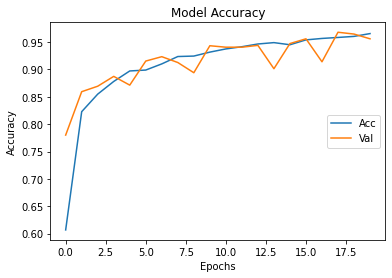

In [26]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'center right')
plt.show()

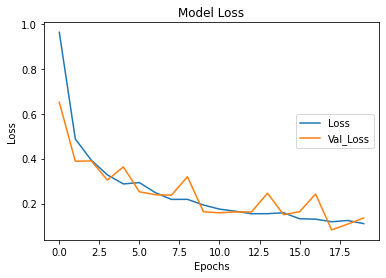

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss','Val_Loss'], loc = 'center right')
plt.show()

In [28]:
predictions= model.predict(test_set)

In [29]:
predictions

array([[9.9996495e-01, 9.5859420e-10, 1.5320282e-05, 1.9675028e-05,
        1.0269459e-12, 2.7516842e-09],
       [9.9998784e-01, 1.5597426e-10, 5.3833483e-06, 6.8235358e-06,
        2.0648664e-13, 2.3639881e-09],
       [9.9994206e-01, 2.7060834e-10, 7.9049762e-08, 5.7584817e-05,
        1.4597648e-09, 2.4464020e-07],
       ...,
       [1.0058773e-12, 2.0955802e-09, 2.5989232e-06, 2.9448546e-09,
        1.6942234e-08, 9.9999738e-01],
       [9.5206002e-07, 9.0101412e-07, 1.7938590e-02, 1.7221471e-06,
        1.6713484e-05, 9.8204112e-01],
       [1.8512630e-05, 4.1330455e-05, 9.6785342e-03, 2.6842393e-02,
        7.2730228e-04, 9.6269196e-01]], dtype=float32)

In [30]:
np.round(predictions)

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [31]:
rounded_prediction = np.argmax(predictions,axis=-1)

In [32]:
count=0
for i in rounded_prediction:
    count+=1
    print("Image: ",count," Prediction: ",i," Label: ",test_set.classes[i])

Image:  1  Prediction:  0  Label:  0
Image:  2  Prediction:  0  Label:  0
Image:  3  Prediction:  0  Label:  0
Image:  4  Prediction:  0  Label:  0
Image:  5  Prediction:  0  Label:  0
Image:  6  Prediction:  0  Label:  0
Image:  7  Prediction:  0  Label:  0
Image:  8  Prediction:  0  Label:  0
Image:  9  Prediction:  0  Label:  0
Image:  10  Prediction:  0  Label:  0
Image:  11  Prediction:  0  Label:  0
Image:  12  Prediction:  0  Label:  0
Image:  13  Prediction:  0  Label:  0
Image:  14  Prediction:  0  Label:  0
Image:  15  Prediction:  0  Label:  0
Image:  16  Prediction:  0  Label:  0
Image:  17  Prediction:  0  Label:  0
Image:  18  Prediction:  0  Label:  0
Image:  19  Prediction:  0  Label:  0
Image:  20  Prediction:  0  Label:  0
Image:  21  Prediction:  0  Label:  0
Image:  22  Prediction:  0  Label:  0
Image:  23  Prediction:  0  Label:  0
Image:  24  Prediction:  0  Label:  0
Image:  25  Prediction:  0  Label:  0
Image:  26  Prediction:  0  Label:  0
Image:  27  Predictio

Image:  322  Prediction:  1  Label:  0
Image:  323  Prediction:  1  Label:  0
Image:  324  Prediction:  1  Label:  0
Image:  325  Prediction:  1  Label:  0
Image:  326  Prediction:  1  Label:  0
Image:  327  Prediction:  1  Label:  0
Image:  328  Prediction:  1  Label:  0
Image:  329  Prediction:  1  Label:  0
Image:  330  Prediction:  1  Label:  0
Image:  331  Prediction:  1  Label:  0
Image:  332  Prediction:  1  Label:  0
Image:  333  Prediction:  1  Label:  0
Image:  334  Prediction:  1  Label:  0
Image:  335  Prediction:  1  Label:  0
Image:  336  Prediction:  1  Label:  0
Image:  337  Prediction:  1  Label:  0
Image:  338  Prediction:  1  Label:  0
Image:  339  Prediction:  0  Label:  0
Image:  340  Prediction:  1  Label:  0
Image:  341  Prediction:  1  Label:  0
Image:  342  Prediction:  1  Label:  0
Image:  343  Prediction:  1  Label:  0
Image:  344  Prediction:  1  Label:  0
Image:  345  Prediction:  1  Label:  0
Image:  346  Prediction:  1  Label:  0
Image:  347  Prediction: 

Image:  664  Prediction:  2  Label:  0
Image:  665  Prediction:  2  Label:  0
Image:  666  Prediction:  2  Label:  0
Image:  667  Prediction:  2  Label:  0
Image:  668  Prediction:  2  Label:  0
Image:  669  Prediction:  2  Label:  0
Image:  670  Prediction:  2  Label:  0
Image:  671  Prediction:  2  Label:  0
Image:  672  Prediction:  2  Label:  0
Image:  673  Prediction:  2  Label:  0
Image:  674  Prediction:  2  Label:  0
Image:  675  Prediction:  2  Label:  0
Image:  676  Prediction:  2  Label:  0
Image:  677  Prediction:  2  Label:  0
Image:  678  Prediction:  2  Label:  0
Image:  679  Prediction:  2  Label:  0
Image:  680  Prediction:  2  Label:  0
Image:  681  Prediction:  2  Label:  0
Image:  682  Prediction:  2  Label:  0
Image:  683  Prediction:  2  Label:  0
Image:  684  Prediction:  2  Label:  0
Image:  685  Prediction:  2  Label:  0
Image:  686  Prediction:  2  Label:  0
Image:  687  Prediction:  2  Label:  0
Image:  688  Prediction:  2  Label:  0
Image:  689  Prediction: 

Image:  987  Prediction:  3  Label:  0
Image:  988  Prediction:  3  Label:  0
Image:  989  Prediction:  3  Label:  0
Image:  990  Prediction:  3  Label:  0
Image:  991  Prediction:  3  Label:  0
Image:  992  Prediction:  3  Label:  0
Image:  993  Prediction:  3  Label:  0
Image:  994  Prediction:  3  Label:  0
Image:  995  Prediction:  3  Label:  0
Image:  996  Prediction:  3  Label:  0
Image:  997  Prediction:  3  Label:  0
Image:  998  Prediction:  3  Label:  0
Image:  999  Prediction:  3  Label:  0
Image:  1000  Prediction:  3  Label:  0
Image:  1001  Prediction:  3  Label:  0
Image:  1002  Prediction:  3  Label:  0
Image:  1003  Prediction:  3  Label:  0
Image:  1004  Prediction:  3  Label:  0
Image:  1005  Prediction:  3  Label:  0
Image:  1006  Prediction:  3  Label:  0
Image:  1007  Prediction:  3  Label:  0
Image:  1008  Prediction:  3  Label:  0
Image:  1009  Prediction:  3  Label:  0
Image:  1010  Prediction:  3  Label:  0
Image:  1011  Prediction:  3  Label:  0
Image:  1012 

Image:  1307  Prediction:  4  Label:  0
Image:  1308  Prediction:  4  Label:  0
Image:  1309  Prediction:  4  Label:  0
Image:  1310  Prediction:  4  Label:  0
Image:  1311  Prediction:  4  Label:  0
Image:  1312  Prediction:  4  Label:  0
Image:  1313  Prediction:  4  Label:  0
Image:  1314  Prediction:  4  Label:  0
Image:  1315  Prediction:  4  Label:  0
Image:  1316  Prediction:  4  Label:  0
Image:  1317  Prediction:  4  Label:  0
Image:  1318  Prediction:  4  Label:  0
Image:  1319  Prediction:  4  Label:  0
Image:  1320  Prediction:  4  Label:  0
Image:  1321  Prediction:  4  Label:  0
Image:  1322  Prediction:  4  Label:  0
Image:  1323  Prediction:  4  Label:  0
Image:  1324  Prediction:  4  Label:  0
Image:  1325  Prediction:  4  Label:  0
Image:  1326  Prediction:  4  Label:  0
Image:  1327  Prediction:  4  Label:  0
Image:  1328  Prediction:  4  Label:  0
Image:  1329  Prediction:  4  Label:  0
Image:  1330  Prediction:  4  Label:  0
Image:  1331  Prediction:  4  Label:  0


Image:  1599  Prediction:  2  Label:  0
Image:  1600  Prediction:  5  Label:  0
Image:  1601  Prediction:  5  Label:  0
Image:  1602  Prediction:  2  Label:  0
Image:  1603  Prediction:  3  Label:  0
Image:  1604  Prediction:  5  Label:  0
Image:  1605  Prediction:  5  Label:  0
Image:  1606  Prediction:  0  Label:  0
Image:  1607  Prediction:  5  Label:  0
Image:  1608  Prediction:  5  Label:  0
Image:  1609  Prediction:  5  Label:  0
Image:  1610  Prediction:  5  Label:  0
Image:  1611  Prediction:  5  Label:  0
Image:  1612  Prediction:  5  Label:  0
Image:  1613  Prediction:  5  Label:  0
Image:  1614  Prediction:  5  Label:  0
Image:  1615  Prediction:  5  Label:  0
Image:  1616  Prediction:  5  Label:  0
Image:  1617  Prediction:  5  Label:  0
Image:  1618  Prediction:  5  Label:  0
Image:  1619  Prediction:  5  Label:  0
Image:  1620  Prediction:  5  Label:  0
Image:  1621  Prediction:  5  Label:  0
Image:  1622  Prediction:  5  Label:  0
Image:  1623  Prediction:  5  Label:  0


In [33]:
test_set.classes

array([0, 0, 0, ..., 5, 5, 5])

In [34]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max()/2.

    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [35]:
cm = confusion_matrix(y_true=test_set.classes,y_pred=rounded_prediction)

In [36]:
cm_plot_labels=["1","2","3","4","5","6"]

Confusion matrix, without normalization
[[296   0   1   3   0   0]
 [  6 292   0   1   0   1]
 [  1   0 291   5   0   3]
 [ 24   0   1 270   2   3]
 [  0   0   0   3 297   0]
 [  2   0  15   7   0 276]]


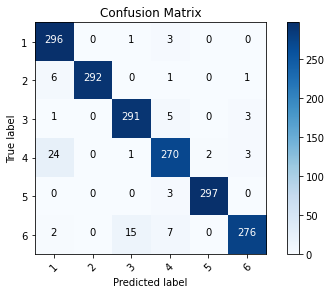

In [37]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [38]:
print(classification_report(test_set.classes,rounded_prediction))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       300
           1       1.00      0.97      0.99       300
           2       0.94      0.97      0.96       300
           3       0.93      0.90      0.92       300
           4       0.99      0.99      0.99       300
           5       0.98      0.92      0.95       300

    accuracy                           0.96      1800
   macro avg       0.96      0.96      0.96      1800
weighted avg       0.96      0.96      0.96      1800

